In [78]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
# Read training data
train_home_team_statistics_df = pd.read_csv('D:/Downloads/Train_Data/train_home_team_statistics_df.csv', index_col=0)
train_away_team_statistics_df = pd.read_csv('D:/Downloads/Train_Data/train_away_team_statistics_df.csv', index_col=0)
train_scores = pd.read_csv('D:/Downloads/Y_train_football.csv', index_col=0)

# Data preparation
train_home = train_home_team_statistics_df.iloc[:, 2:]
train_away = train_away_team_statistics_df.iloc[:, 2:]

# Rename columns
train_home.columns = 'HOME_' + train_home.columns
train_away.columns = 'AWAY_' + train_away.columns

# Reassemble data in one dataset
train_data = pd.concat([train_home, train_away], join='inner', axis=1)
train_scores = train_scores.loc[train_data.index]

# Replace infinite data with NaN
train_data = train_data.replace({np.inf: np.nan, -np.inf: np.nan})


# Data preprocessing & EDA

In [75]:
train_data.head()

,HOME_TEAM_SHOTS_TOTAL_season_sum,HOME_TEAM_SHOTS_INSIDEBOX_season_sum,HOME_TEAM_SHOTS_OFF_TARGET_season_sum,HOME_TEAM_SHOTS_ON_TARGET_season_sum,HOME_TEAM_SHOTS_OUTSIDEBOX_season_sum,HOME_TEAM_PASSES_season_sum,HOME_TEAM_SUCCESSFUL_PASSES_season_sum,HOME_TEAM_SAVES_season_sum,HOME_TEAM_CORNERS_season_sum,HOME_TEAM_FOULS_season_sum,...,AWAY_TEAM_YELLOWCARDS_5_last_match_std,AWAY_TEAM_REDCARDS_5_last_match_std,AWAY_TEAM_OFFSIDES_5_last_match_std,AWAY_TEAM_ATTACKS_5_last_match_std,AWAY_TEAM_PENALTIES_5_last_match_std,AWAY_TEAM_SUBSTITUTIONS_5_last_match_std,AWAY_TEAM_BALL_SAFE_5_last_match_std,AWAY_TEAM_DANGEROUS_ATTACKS_5_last_match_std,AWAY_TEAM_INJURIES_5_last_match_std,AWAY_TEAM_GOALS_5_last_match_std
ID,,,,,,,,,,,,,,,,,,,,,
0,3.0,2.0,5.0,2.0,1.0,2.0,2.0,5.0,3.0,6.0,...,5.0,5.0,4.0,0.0,6.0,8.0,4.0,3.0,2.000000,3.0
1,6.0,8.0,3.0,6.0,5.0,8.0,7.0,10.0,6.0,8.0,...,0.0,0.0,3.0,1.0,8.0,4.0,10.0,0.0,5.000000,3.0
2,4.0,2.0,5.0,2.0,8.0,1.0,1.0,2.0,2.0,7.0,...,6.0,10.0,4.0,4.0,0.0,8.0,3.0,0.0,9.000000,6.0
3,7.0,5.0,5.0,6.0,6.0,9.0,9.0,2.0,2.0,0.0,...,0.0,0.0,1.0,2.0,0.0,5.0,6.0,3.0,3.886207,2.0
4,3.0,3.0,2.0,3.0,4.0,4.0,3.0,4.0,4.0,7.0,...,1.0,0.0,4.0,4.0,9.0,4.0,1.0,4.0,6.000000,5.0


In [152]:
np.array(train_data.columns)

array(['HOME_TEAM_SHOTS_TOTAL_season_sum',
       'HOME_TEAM_SHOTS_INSIDEBOX_season_sum',
       'HOME_TEAM_SHOTS_OFF_TARGET_season_sum',
       'HOME_TEAM_SHOTS_ON_TARGET_season_sum',
       'HOME_TEAM_SHOTS_OUTSIDEBOX_season_sum',
       'HOME_TEAM_PASSES_season_sum',
       'HOME_TEAM_SUCCESSFUL_PASSES_season_sum',
       'HOME_TEAM_SAVES_season_sum', 'HOME_TEAM_CORNERS_season_sum',
       'HOME_TEAM_FOULS_season_sum', 'HOME_TEAM_YELLOWCARDS_season_sum',
       'HOME_TEAM_REDCARDS_season_sum', 'HOME_TEAM_OFFSIDES_season_sum',
       'HOME_TEAM_ATTACKS_season_sum', 'HOME_TEAM_PENALTIES_season_sum',
       'HOME_TEAM_SUBSTITUTIONS_season_sum',
       'HOME_TEAM_BALL_SAFE_season_sum',
       'HOME_TEAM_DANGEROUS_ATTACKS_season_sum',
       'HOME_TEAM_INJURIES_season_sum', 'HOME_TEAM_GOALS_season_sum',
       'HOME_TEAM_GAME_WON_season_sum', 'HOME_TEAM_GAME_DRAW_season_sum',
       'HOME_TEAM_GAME_LOST_season_sum',
       'HOME_TEAM_SHOTS_TOTAL_season_average',
       'HOME_TEAM_SHOTS_I

In [144]:
train_data.describe()

,HOME_TEAM_SHOTS_TOTAL_season_sum,HOME_TEAM_SHOTS_INSIDEBOX_season_sum,HOME_TEAM_SHOTS_OFF_TARGET_season_sum,HOME_TEAM_SHOTS_ON_TARGET_season_sum,HOME_TEAM_SHOTS_OUTSIDEBOX_season_sum,HOME_TEAM_PASSES_season_sum,HOME_TEAM_SUCCESSFUL_PASSES_season_sum,HOME_TEAM_SAVES_season_sum,HOME_TEAM_CORNERS_season_sum,HOME_TEAM_FOULS_season_sum,...,AWAY_TEAM_YELLOWCARDS_5_last_match_std,AWAY_TEAM_REDCARDS_5_last_match_std,AWAY_TEAM_OFFSIDES_5_last_match_std,AWAY_TEAM_ATTACKS_5_last_match_std,AWAY_TEAM_PENALTIES_5_last_match_std,AWAY_TEAM_SUBSTITUTIONS_5_last_match_std,AWAY_TEAM_BALL_SAFE_5_last_match_std,AWAY_TEAM_DANGEROUS_ATTACKS_5_last_match_std,AWAY_TEAM_INJURIES_5_last_match_std,AWAY_TEAM_GOALS_5_last_match_std
count,12043.000000,10918.000000,12303.000000,12301.000000,10916.000000,10890.000000,10919.000000,11523.000000,12302.000000,11546.000000,...,12302.000000,12240.000000,11298.000000,12303.000000,12290.000000,12212.000000,10467.000000,12303.000000,8990.000000,12301.000000
mean,4.391182,4.299872,4.511339,4.150882,4.524643,4.350597,4.130049,4.674043,4.505284,5.135718,...,3.906438,2.805474,3.600195,3.936032,3.701302,3.271536,3.804911,3.758026,3.886207,3.687342
std,2.871062,2.928012,2.806821,2.861291,2.845130,2.908079,2.900489,2.871876,2.802689,2.839771,...,2.823153,3.774745,2.831322,2.823259,3.696370,3.335124,2.863371,2.814694,2.795961,2.856081
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,...,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,...,4.000000,0.000000,3.000000,4.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,7.000000,6.000000,7.000000,...,6.000000,6.000000,5.000000,6.000000,7.000000,6.000000,6.000000,6.000000,6.000000,6.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [52]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12303 entries, 0 to 12302
Columns: 280 entries, HOME_TEAM_SHOTS_TOTAL_season_sum to AWAY_TEAM_GOALS_5_last_match_std
dtypes: float64(280)
memory usage: 26.6 MB


In [110]:
train_data.duplicated()

ID
0        False
1        False
2        False
3        False
4        False
         ...  
12298    False
12299    False
12300    False
12301    False
12302    False
Length: 12303, dtype: bool

In [83]:
train_scores

,HOME_WINS,DRAW,AWAY_WINS
ID,,,
0,0,0,1
1,0,1,0
2,0,0,1
3,1,0,0
4,0,1,0
...,...,...,...
12298,0,0,1
12299,0,0,1
12300,0,0,1


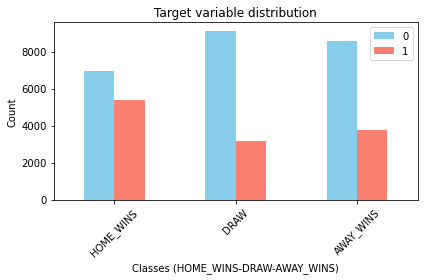

In [82]:
df = train_scores
counts = df.apply(pd.Series.value_counts).T
counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Target variable distribution')
plt.xlabel('Classes (HOME_WINS-DRAW-AWAY_WINS)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [4]:
round((train_data.isnull().sum()/train_data.shape[0])*100,2)

HOME_TEAM_SHOTS_TOTAL_season_sum                 2.11
HOME_TEAM_SHOTS_INSIDEBOX_season_sum            11.26
HOME_TEAM_SHOTS_OFF_TARGET_season_sum            0.00
HOME_TEAM_SHOTS_ON_TARGET_season_sum             0.02
HOME_TEAM_SHOTS_OUTSIDEBOX_season_sum           11.27
                                                ...  
AWAY_TEAM_SUBSTITUTIONS_5_last_match_std         0.74
AWAY_TEAM_BALL_SAFE_5_last_match_std            14.92
AWAY_TEAM_DANGEROUS_ATTACKS_5_last_match_std     0.00
AWAY_TEAM_INJURIES_5_last_match_std             26.93
AWAY_TEAM_GOALS_5_last_match_std                 0.02
Length: 280, dtype: float64

In [229]:
round((train_home.isnull().sum()/train_home.shape[0])*100,2)

HOME_TEAM_SHOTS_TOTAL_season_sum                 2.11
HOME_TEAM_SHOTS_INSIDEBOX_season_sum            11.26
HOME_TEAM_SHOTS_OFF_TARGET_season_sum            0.00
HOME_TEAM_SHOTS_ON_TARGET_season_sum             0.02
HOME_TEAM_SHOTS_OUTSIDEBOX_season_sum           11.27
                                                ...  
HOME_TEAM_SUBSTITUTIONS_5_last_match_std         0.74
HOME_TEAM_BALL_SAFE_5_last_match_std            14.59
HOME_TEAM_DANGEROUS_ATTACKS_5_last_match_std     0.00
HOME_TEAM_INJURIES_5_last_match_std             26.97
HOME_TEAM_GOALS_5_last_match_std                 0.02
Length: 140, dtype: float64

In [79]:
# Replace missing values with the mean value of each feature 
train_data = train_data.fillna(train_data.mean())

In [128]:
# Data normalisation
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)

In [199]:
train_home_scaled = scaler.fit_transform(train_home)
train_away_scaled = scaler.fit_transform(train_away)

In [204]:
train_home_scaled = train_data.fillna(train_home.mean())
train_away_scaled = train_data.fillna(train_away.mean())

In [129]:
print('Mean value after z-score', train_data_scaled.mean())
print('Standard deviation value after z-score', train_data_scaled.std())

Mean value after z-score 1.917420046105448e-18
Standard deviation value after z-score 1.0000000000000002


In [7]:
pd.DataFrame(train_data_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
count,1.230300e+04,1.230300e+04,1.230300e+04,1.230300e+04,1.230300e+04,1.230300e+04,1.230300e+04,1.230300e+04,1.230300e+04,1.230300e+04,...,1.230300e+04,1.230300e+04,1.230300e+04,1.230300e+04,1.230300e+04,1.230300e+04,1.230300e+04,1.230300e+04,1.230300e+04,1.230300e+04
mean,1.533719e-16,6.921410e-17,-9.240579e-17,-1.515671e-16,5.410792e-17,-2.549687e-16,2.337431e-16,-2.144554e-16,2.944081e-17,1.238454e-16,...,-5.566366e-16,3.310185e-16,-2.060180e-16,8.663042e-18,8.678925e-16,-1.235927e-16,-2.425652e-17,-7.374934e-16,-1.467122e-16,2.467162e-16
std,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,...,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00
min,-1.545949e+00,-1.558965e+00,-1.607342e+00,-1.450879e+00,-1.688402e+00,-1.590209e+00,-1.511534e+00,-1.681778e+00,-1.607617e+00,-1.866923e+00,...,-1.383827e+00,-7.451628e-01,-1.326969e+00,-1.394202e+00,-1.001904e+00,-9.846222e-01,-1.440728e+00,-1.335200e+00,-1.626090e+00,-1.291207e+00
25%,-8.418336e-01,-8.338436e-01,-8.947634e-01,-7.518089e-01,-5.689310e-01,-8.591787e-01,-7.795649e-01,-6.023411e-01,-8.939584e-01,-7.763707e-01,...,-6.753418e-01,-7.451628e-01,-5.898038e-01,-6.857716e-01,-1.001904e+00,-9.846222e-01,-6.834287e-01,-6.246142e-01,-3.708120e-01,-5.908616e-01
50%,-1.377184e-01,0.000000e+00,-1.821846e-01,-5.273858e-02,3.314299e-16,0.000000e+00,-4.759576e-02,0.000000e+00,-1.803000e-01,-4.933586e-02,...,3.314367e-02,-7.451628e-01,-2.212213e-01,2.265848e-02,3.515443e-01,-8.172325e-02,0.000000e+00,-2.693214e-01,-1.858185e-16,-2.406887e-01
75%,5.663967e-01,6.164001e-01,5.303943e-01,6.463317e-01,5.505398e-01,6.028818e-01,6.843734e-01,8.369075e-01,5.333584e-01,6.776990e-01,...,7.416291e-01,8.484991e-01,5.159437e-01,7.310885e-01,6.222340e-01,8.211757e-01,4.525201e-01,7.965571e-01,4.660400e-01,8.098299e-01
max,1.974627e+00,2.066644e+00,1.955552e+00,2.044472e+00,2.043167e+00,2.064942e+00,2.148312e+00,1.916344e+00,1.960675e+00,1.768251e+00,...,2.158600e+00,1.910940e+00,2.358856e+00,2.147949e+00,1.704993e+00,2.025041e+00,2.345768e+00,2.217728e+00,2.558170e+00,2.210521e+00


In [194]:
correlations = train_data.corrwith(train_scores['HOME_WINS'])
print(correlations.max())
correlations = train_data.corrwith(train_scores['AWAY_WINS'])
print(correlations.max())
correlations = train_data.corrwith(train_scores['DRAW'])
print(correlations.max())

0.1876900484091145
0.16628323533613848
0.03214029840109654


In [140]:
corr_train_data = train_data.corr()
corr_train_data

,HOME_TEAM_SHOTS_TOTAL_season_sum,HOME_TEAM_SHOTS_INSIDEBOX_season_sum,HOME_TEAM_SHOTS_OFF_TARGET_season_sum,HOME_TEAM_SHOTS_ON_TARGET_season_sum,HOME_TEAM_SHOTS_OUTSIDEBOX_season_sum,HOME_TEAM_PASSES_season_sum,HOME_TEAM_SUCCESSFUL_PASSES_season_sum,HOME_TEAM_SAVES_season_sum,HOME_TEAM_CORNERS_season_sum,HOME_TEAM_FOULS_season_sum,...,AWAY_TEAM_YELLOWCARDS_5_last_match_std,AWAY_TEAM_REDCARDS_5_last_match_std,AWAY_TEAM_OFFSIDES_5_last_match_std,AWAY_TEAM_ATTACKS_5_last_match_std,AWAY_TEAM_PENALTIES_5_last_match_std,AWAY_TEAM_SUBSTITUTIONS_5_last_match_std,AWAY_TEAM_BALL_SAFE_5_last_match_std,AWAY_TEAM_DANGEROUS_ATTACKS_5_last_match_std,AWAY_TEAM_INJURIES_5_last_match_std,AWAY_TEAM_GOALS_5_last_match_std
HOME_TEAM_SHOTS_TOTAL_season_sum,1.000000,0.798253,0.746031,0.761586,0.620171,0.477016,0.474153,-0.231840,0.602489,-0.025594,...,-0.011176,-0.018114,0.006504,-0.013372,0.006034,-0.040123,-0.000273,-0.004564,0.002274,-0.011089
HOME_TEAM_SHOTS_INSIDEBOX_season_sum,0.798253,1.000000,0.626663,0.714089,0.344984,0.531111,0.518277,-0.277215,0.581002,-0.057440,...,-0.007753,-0.025710,0.009198,-0.024947,-0.006078,-0.026249,0.003823,0.003664,0.000095,0.002726
HOME_TEAM_SHOTS_OFF_TARGET_season_sum,0.746031,0.626663,1.000000,0.530535,0.545669,0.300365,0.297346,-0.210067,0.510741,0.023623,...,-0.000134,-0.010665,-0.003210,-0.011002,-0.004229,-0.016740,0.004356,-0.001047,0.004340,-0.012044
HOME_TEAM_SHOTS_ON_TARGET_season_sum,0.761586,0.714089,0.530535,1.000000,0.430962,0.507532,0.506352,-0.216965,0.579475,-0.099061,...,-0.013196,-0.028107,0.011121,-0.002616,0.000837,-0.020414,0.015106,0.007999,-0.000301,-0.006998
HOME_TEAM_SHOTS_OUTSIDEBOX_season_sum,0.620171,0.344984,0.545669,0.430962,1.000000,0.310456,0.320094,-0.146719,0.325233,-0.051112,...,0.003324,-0.006238,0.002781,-0.007579,-0.001532,-0.022692,-0.000714,-0.002215,0.012510,-0.026651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AWAY_TEAM_SUBSTITUTIONS_5_last_match_std,-0.040123,-0.026249,-0.016740,-0.020414,-0.022692,-0.012440,-0.017224,0.014850,-0.014049,0.023629,...,0.005471,0.017451,0.000802,0.018174,-0.005056,1.000000,0.005438,-0.004976,-0.028154,-0.003077
AWAY_TEAM_BALL_SAFE_5_last_match_std,-0.000273,0.003823,0.004356,0.015106,-0.000714,-0.004411,-0.003945,0.007493,0.008995,-0.009444,...,0.008290,0.011372,0.032838,0.104419,0.004271,0.005438,1.000000,0.023909,0.006298,0.003630
AWAY_TEAM_DANGEROUS_ATTACKS_5_last_match_std,-0.004564,0.003664,-0.001047,0.007999,-0.002215,-0.018941,-0.015012,0.004863,-0.007211,-0.004512,...,-0.001761,0.003316,0.024927,0.360350,0.038487,-0.004976,0.023909,1.000000,-0.021978,0.046815
AWAY_TEAM_INJURIES_5_last_match_std,0.002274,0.000095,0.004340,-0.000301,0.012510,0.001189,0.000952,-0.004770,-0.003358,0.011505,...,-0.009274,0.005844,-0.023374,-0.013632,0.004916,-0.028154,0.006298,-0.021978,1.000000,-0.018431


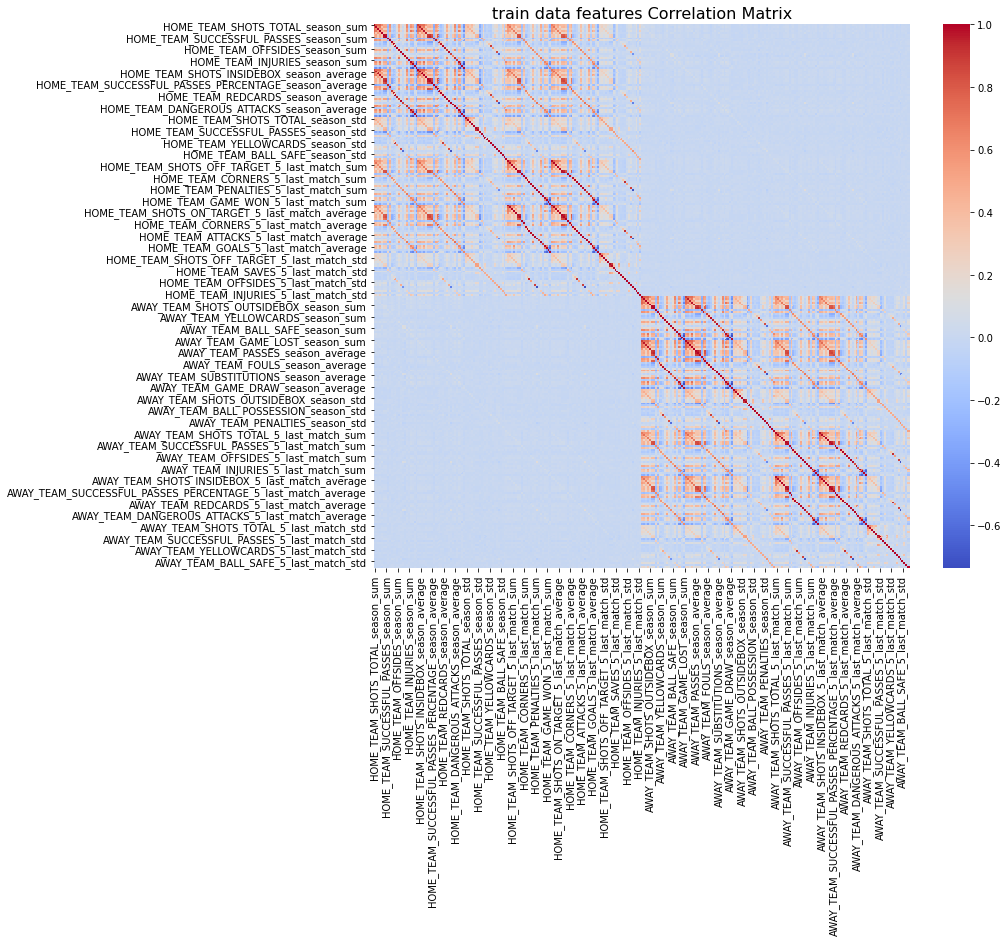

In [142]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_train_data, annot=False, cmap='coolwarm', fmt='.2f')

plt.title("train data features Correlation Matrix", fontsize=16)
plt.show()

# Splitting data into train, test and validation sets

In [137]:
# Target variable
train_new_y = train_scores[['HOME_WINS', 'DRAW', 'AWAY_WINS']]

# Data splitting to train, validation and test
X_train, X_test, y_train, y_test = model_selection.train_test_split(train_data_scaled, train_new_y, train_size=0.8, random_state=42)
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X_train, y_train, train_size=0.8, random_state=42)

# XGBoost Model

In [138]:
# XGBOOST parameters
params_1 = {
    'booster': 'gbtree',
    'tree_method': 'hist',
    'max_depth': 4,
    'learning_rate': 0.025,
    'objective': 'multi:softprob',
    'num_class': 3,  # Trois classes : HOME_WINS, DRAW, AWAY_WINS
    'eval_metric': 'mlogloss'
}

original_columns = np.array(train_data_selected.columns).tolist()

# DMatrix for XGBoost
d_train = xgb.DMatrix(X_train, label=np.argmax(y_train.values, axis=1), feature_names=original_columns)  
d_valid = xgb.DMatrix(X_valid, label=np.argmax(y_valid.values, axis=1), feature_names=original_columns)

# Early stopping
num_round = 10000
evallist = [(d_train, 'train'), (d_valid, 'eval')]

evals_result = {}

# Model training
bst = xgb.train(params_1, d_train, num_round, evallist, early_stopping_rounds=100, evals_result=evals_result)


XGBoostError: [11:42:22] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\metric\metric.cc:49: Unknown metric function accuracy

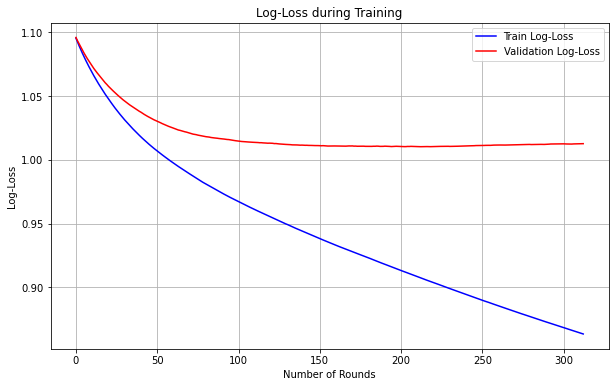

In [133]:
# Extract the log-loss values for train and validation from evals_result
train_logloss = evals_result['train']['mlogloss']
valid_logloss = evals_result['eval']['mlogloss']

# Plot the log-loss curves
plt.figure(figsize=(10, 6))
plt.plot(train_logloss, label='Train Log-Loss', color='blue')
plt.plot(valid_logloss, label='Validation Log-Loss', color='red')
plt.xlabel('Number of Rounds')
plt.ylabel('Log-Loss')
plt.title('Log-Loss during Training')
plt.legend()
plt.grid(True)
plt.show()

In [125]:
# Extract feature importance
importance = bst.get_score(importance_type='weight')
sorted_dict = sorted(importance.items(), key=lambda item: item[1], reverse=True)
dict(sorted_dict[:100]).keys()

dict_keys(['AWAY_TEAM_GAME_LOST_season_sum', 'AWAY_TEAM_SAVES_season_average', 'HOME_TEAM_BALL_POSSESSION_season_average', 'AWAY_TEAM_ATTACKS_season_average', 'HOME_TEAM_GAME_WON_season_sum', 'HOME_TEAM_GAME_WON_season_average', 'HOME_TEAM_BALL_SAFE_season_std', 'HOME_TEAM_YELLOWCARDS_season_std', 'AWAY_TEAM_GOALS_season_std', 'HOME_TEAM_GAME_LOST_season_sum', 'AWAY_TEAM_GAME_LOST_season_average', 'HOME_TEAM_SHOTS_TOTAL_season_average', 'HOME_TEAM_CORNERS_5_last_match_std', 'HOME_TEAM_YELLOWCARDS_5_last_match_std', 'AWAY_TEAM_SHOTS_INSIDEBOX_5_last_match_sum', 'HOME_TEAM_PASSES_5_last_match_std', 'HOME_TEAM_GOALS_5_last_match_sum', 'AWAY_TEAM_GAME_WON_season_sum', 'AWAY_TEAM_FOULS_5_last_match_std', 'HOME_TEAM_GAME_WON_5_last_match_sum', 'HOME_TEAM_SHOTS_OFF_TARGET_season_average', 'HOME_TEAM_SAVES_5_last_match_sum', 'AWAY_TEAM_PASSES_season_std', 'AWAY_TEAM_BALL_SAFE_season_std', 'AWAY_TEAM_DANGEROUS_ATTACKS_season_std', 'HOME_TEAM_DANGEROUS_ATTACKS_season_std', 'AWAY_TEAM_BALL_POSSES

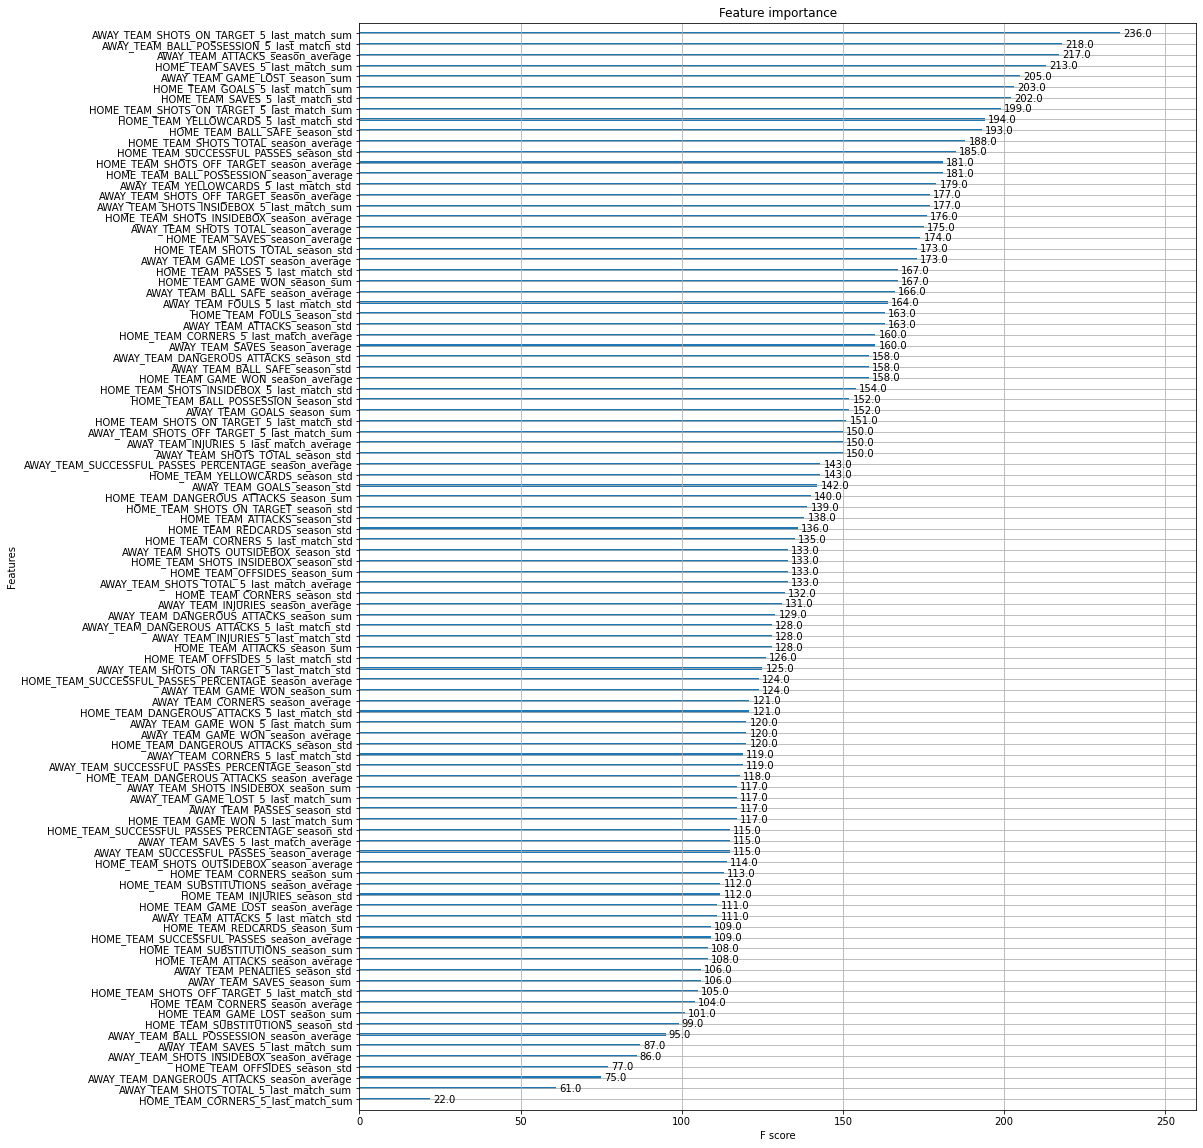

In [134]:
# Visualisation de l'importance des fonctionnalités
xgb.plot_importance(bst, max_num_features=100)
plt.gcf().set_size_inches(15, 20)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the model
model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, eval_metric='mlogloss')

# Define the hyperparameters grid
param_grid = {
    'max_depth': [4, 5],
    'learning_rate': [0.025, 0.1],
    'n_estimators': [150, 200],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8,0.9,1.0]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1)
grid_search.fit(X_train, np.argmax(y_train.values, axis=1))

# Output the best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [136]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Predictions on test dataset
X_test_xgb = xgb.DMatrix(X_test)
predictions = bst.predict(X_test_xgb, iteration_range=(0, bst.best_iteration))

predicted_classes = np.argmax(predictions, axis=1)

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test.values, axis=1), predicted_classes)
f1 = f1_score(np.argmax(y_test.values, axis=1), predicted_classes, average='micro')
precision = precision_score(np.argmax(y_test.values, axis=1), predicted_classes, average='micro')
f1 = f1_score(np.argmax(y_test.values, axis=1), predicted_classes, average='micro')
recall = recall_score(np.argmax(y_test.values, axis=1), predicted_classes, average='micro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"f1 score: {f1:.4f}")
print(f"Recall: {recall:.4f}")


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [41]:
# Soumission des prédictions
test_home = pd.read_csv('D:/Downloads/Test_Data/test_home_team_statistics_df.csv', index_col=0)
test_away = pd.read_csv('D:/Downloads/Test_Data/test_away_team_statistics_df.csv', index_col=0)

test_home.columns = 'HOME_' + test_home.columns
test_away.columns = 'AWAY_' + test_away.columns

test_data = pd.concat([test_home, test_away], join='inner', axis=1)
test_data_imputed = imputer.transform(test_data)
test_data_scaled = scaler.transform(test_data_imputed)

# Prédictions sur les données de test
X_bench = xgb.DMatrix(test_data_scaled)
predictions = bst.predict(X_bench, iteration_range=(0, bst.best_iteration))

# Sélection de la classe avec la probabilité la plus élevée
predicted_classes = np.argmax(predictions, axis=1)

# Création d'un DataFrame pour les résultats
submission = pd.DataFrame(predicted_classes, columns=['Prediction'])
submission['HOME_WINS'] = (submission['Prediction'] == 0).astype(int)
submission['DRAW'] = (submission['Prediction'] == 1).astype(int)
submission['AWAY_WINS'] = (submission['Prediction'] == 2).astype(int)

# Sauvegarde des résultats de la soumission
submission = submission[['HOME_WINS', 'DRAW', 'AWAY_WINS']]
submission.index = test_data.index
submission.reset_index(inplace=True)
submission.to_csv('D:/Downloads/benchmark_submission.csv', index=False)

# RandomForest Model

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
# Initialize RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)

# Train the model
rf_model.fit(X_train, np.argmax(y_train.values, axis=1))

# Predict on the validation set
y_pred = rf_model.predict(X_valid)

# Evaluate the model
accuracy = accuracy_score(np.argmax(y_valid.values, axis=1), y_pred)
print(f"Random Forest Model Accuracy: {accuracy:.4f}")

Random Forest Model Accuracy: 0.5033


In [21]:
from sklearn.model_selection import GridSearchCV
# Perform cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Cross-validation score (using accuracy)
cv_scores = cross_val_score(rf_model, X_train, np.argmax(y_train.values, axis=1), cv=cv, scoring='accuracy')

# Print cross-validation results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.4f}")

Cross-Validation Accuracy Scores: [0.50285714 0.4768254  0.47238095 0.50762389 0.4707751 ]
Mean Cross-Validation Accuracy: 0.4861
Standard Deviation of Cross-Validation Accuracy: 0.0158


In [19]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model with the best parameters found by grid search
grid_search.fit(X_train, np.argmax(y_train.values, axis=1))

# Output the best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Best Cross-Validation Accuracy: 0.4881


In [46]:
test_home = pd.read_csv('D:/Downloads/Test_Data/test_home_team_statistics_df.csv', index_col=0)
test_away = pd.read_csv('D:/Downloads/Test_Data/test_away_team_statistics_df.csv', index_col=0)

test_home.columns = 'HOME_' + test_home.columns
test_away.columns = 'AWAY_' + test_away.columns

test_data = pd.concat([test_home, test_away], join='inner', axis=1)
test_data_cleaned = test_data.fillna(test_data.mean())
scaler = StandardScaler()
test_data_scaled = scaler.fit_transform(test_data_cleaned)

predictions = rf_model.predict(test_data_scaled)

submission = pd.DataFrame(predictions, columns=['Prediction'])
submission['HOME_WINS'] = (submission['Prediction'] == 0).astype(int)
submission['DRAW'] = (submission['Prediction'] == 1).astype(int)
submission['AWAY_WINS'] = (submission['Prediction'] == 2).astype(int)

submission = submission[['HOME_WINS', 'DRAW', 'AWAY_WINS']]
submission.index = test_data.index
submission.reset_index(inplace=True)
submission.to_csv('D:/Downloads/benchmark_submission_randomforest.csv', index=False)

# Decision Tree Model

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Decision Tree model parameters
dt_params = {
    'max_depth': 3,
    'min_samples_split': 2,
    'criterion': 'entropy', 
    'random_state': 42, 
    'max_features': 'auto', 
    'min_samples_leaf': 5, 
    'min_samples_split': 18, 
    'splitter': 'random'
}

dt_model = DecisionTreeClassifier(**dt_params)

# Train the model on the training data
dt_model.fit(X_train, np.argmax(y_train.values, axis=1))

# Make predictions on the validation set
y_pred = dt_model.predict(X_valid)

# Calculate the accuracy score
accuracy = accuracy_score(np.argmax(y_valid.values, axis=1), y_pred)

print(f"Decision Tree Model Accuracy: {accuracy}")

Decision Tree Model Accuracy: 0.47943118334179785


In [62]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
precision = precision_score(np.argmax(y_valid.values, axis=1), y_pred, average='weighted')
recall = recall_score(np.argmax(y_valid.values, axis=1), y_pred, average='weighted')
f1 = f1_score(np.argmax(y_valid.values, axis=1), y_pred, average='weighted')
conf_matrix = confusion_matrix(np.argmax(y_valid.values, axis=1), y_pred)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

Precision: 0.39932433272101275
Recall: 0.4154393092940579
F1-Score: 0.40462701671993473
Confusion Matrix:
[[500 164 216]
 [246  94 173]
 [249 103 224]]


In [63]:
from sklearn.model_selection import cross_validate

# Perform cross-validation for multiple metrics
cv_results = cross_validate(dt_model, X_train, np.argmax(y_train.values, axis=1), cv=5, 
                            scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'])

print("Cross-Validation Results:")
print(f"Accuracy: {cv_results['test_accuracy']}")
print(f"Precision (Weighted): {cv_results['test_precision_weighted']}")
print(f"Recall (Weighted): {cv_results['test_recall_weighted']}")
print(f"F1-Score (Weighted): {cv_results['test_f1_weighted']}")
print(f"Mean Accuracy: {cv_results['test_accuracy'].mean()}")
print(f"Mean Precision: {cv_results['test_precision_weighted'].mean()}")
print(f"Mean Recall: {cv_results['test_recall_weighted'].mean()}")
print(f"Mean F1-Score: {cv_results['test_f1_weighted'].mean()}")


Cross-Validation Results:
Accuracy: [0.4152381  0.37968254 0.4215873  0.39135959 0.41296061]
Precision (Weighted): [0.40982558 0.36896462 0.41056052 0.37779089 0.40025708]
Recall (Weighted): [0.4152381  0.37968254 0.4215873  0.39135959 0.41296061]
F1-Score (Weighted): [0.41184867 0.373293   0.41353327 0.38189366 0.40414687]
Mean Accuracy: 0.40416562796232425
Mean Precision: 0.39347973832704886
Mean Recall: 0.40416562796232425
Mean F1-Score: 0.39694309225612706


In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'max_depth': randint(1, 20),               
    'min_samples_split': randint(2, 20),       
    'min_samples_leaf': randint(1, 20),        
    'max_features': ['auto', 'sqrt', 'log2'], 
    'criterion': ['gini', 'entropy'],         
    'splitter': ['best', 'random']            
}

# Set up RandomizedSearchCV with cross-validation
random_search = RandomizedSearchCV(
    estimator=dt_model, 
    param_distributions=param_dist,
    n_iter=100,                     
    cv=5,                           
    verbose=1,                      
    random_state=42,                
    n_jobs=-1                      
)

# Fit RandomizedSearchCV
random_search.fit(X_train, np.argmax(y_train.values, axis=1))

# Get the best hyperparameters and the best score
print("Best Hyperparameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 18, 'splitter': 'random'}
Best Cross-Validation Accuracy: 0.4629753332929953


In [74]:
test_home = pd.read_csv('D:/Downloads/Test_Data/test_home_team_statistics_df.csv', index_col=0)
test_away = pd.read_csv('D:/Downloads/Test_Data/test_away_team_statistics_df.csv', index_col=0)

test_home.columns = 'HOME_' + test_home.columns
test_away.columns = 'AWAY_' + test_away.columns

test_data = pd.concat([test_home, test_away], join='inner', axis=1)
test_data_scaled = test_data.fillna(test_data.mean())
test_data_scaled = scaler.transform(test_data_scaled)

predictions = dt_model.predict(test_data_scaled)

submission = pd.DataFrame(predictions, columns=['Prediction'])
submission['HOME_WINS'] = (submission['Prediction'] == 0).astype(int)
submission['DRAW'] = (submission['Prediction'] == 1).astype(int)
submission['AWAY_WINS'] = (submission['Prediction'] == 2).astype(int)

submission = submission[['HOME_WINS', 'DRAW', 'AWAY_WINS']]
submission.index = test_data.index
submission.reset_index(inplace=True)
submission.to_csv('D:/Downloads/benchmark_submission_decisiontree.csv', index=False)